# Step 1


In [102]:
import tensorflow as tf

import numpy as np
import pandas as pd
import seaborn as sns
from pylab import*
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
#import scikitplot as skplt

%matplotlib inline

# Step 2

In [103]:
df = pd.read_csv('pima-indians-diabetes.csv', sep = '\t')

In [104]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [105]:
df.shape

(768, 9)

In [106]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [107]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.0,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.0,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.0,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.0,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.0,31.99,7.88,0.00,27.30,32.00,36.60,67.10
DiabetesPedigreeFunction,768.0,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.0,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.0,0.35,0.48,0.00,0.00,0.00,1.00,1.00


In [108]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [109]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [148]:
pd.set_option( 'display.width' , 100)
pd.set_option( 'precision' , 3)
correlations = df.corr(method= 'pearson')
print(correlations)

                          Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
Pregnancies                     1.000    0.129          0.141         -0.082   -0.074  0.018   
Glucose                         0.129    1.000          0.153          0.057    0.331  0.221   
BloodPressure                   0.141    0.153          1.000          0.207    0.089  0.282   
SkinThickness                  -0.082    0.057          0.207          1.000    0.437  0.393   
Insulin                        -0.074    0.331          0.089          0.437    1.000  0.198   
BMI                             0.018    0.221          0.282          0.393    0.198  1.000   
DiabetesPedigreeFunction       -0.034    0.137          0.041          0.184    0.185  0.141   
Age                             0.544    0.264          0.240         -0.114   -0.042  0.036   
Outcome                         0.222    0.467          0.065          0.075    0.131  0.293   

                          DiabetesPedig

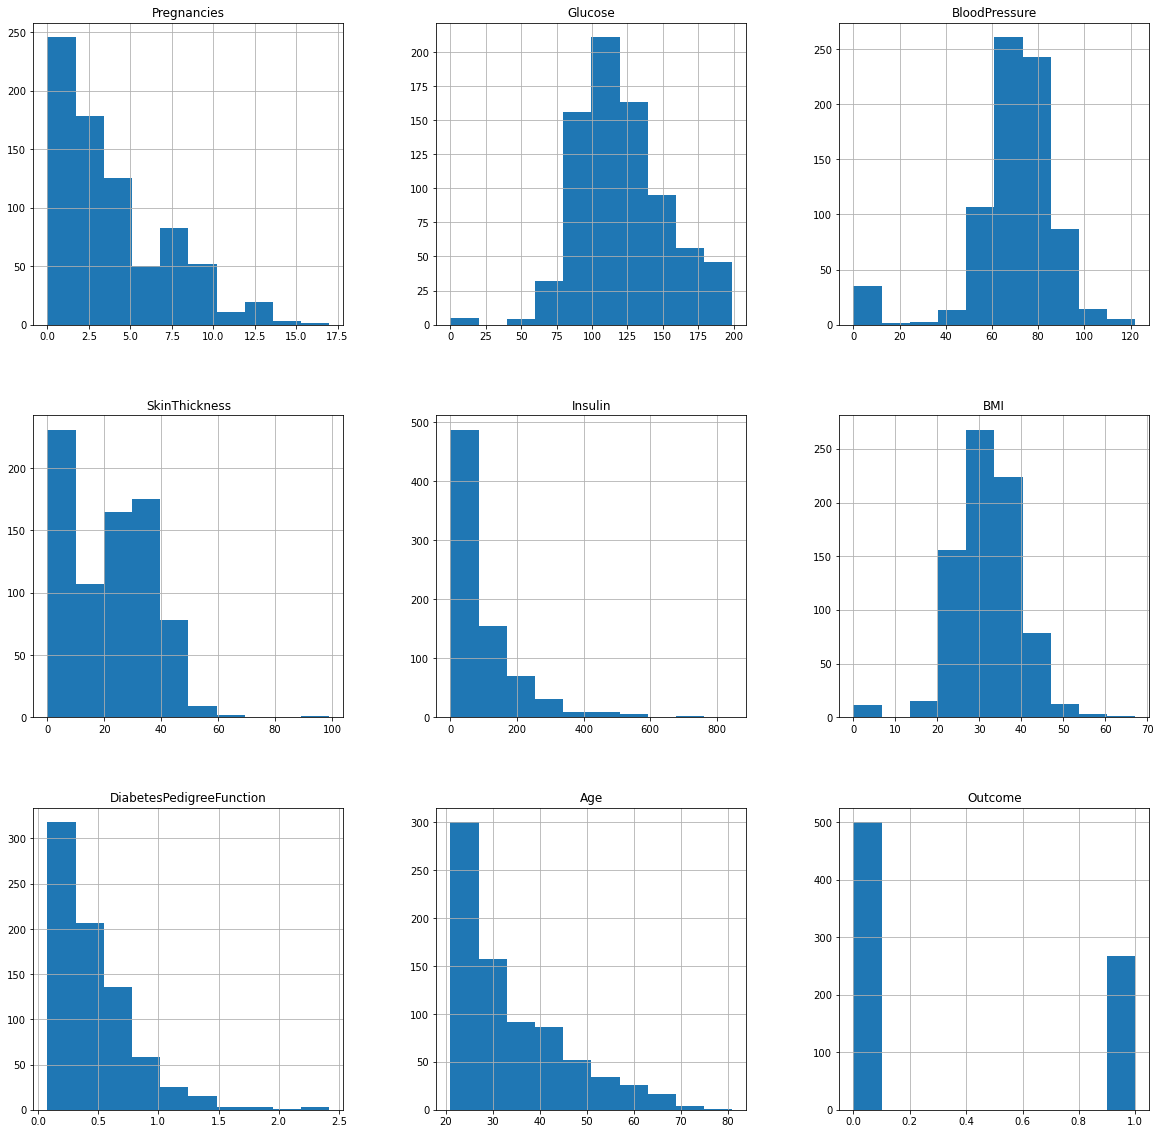

In [149]:
df.hist(figsize=(20,20))
plt.show()

<Figure size 36000x36000 with 0 Axes>

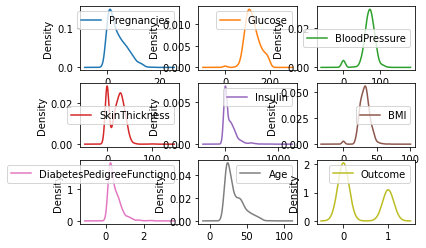

In [158]:
plt.figure(1, figsize=(500,500))
df.plot(kind='density',subplots=True, layout=(3,3), sharex=False)
plt.show()

<Figure size 36000x36000 with 0 Axes>

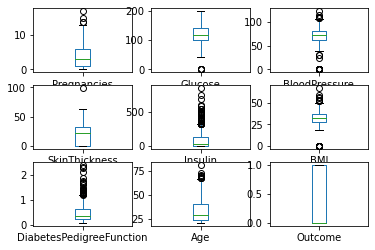

In [166]:
plt.figure(1, figsize=(500,500))
df.plot(kind='box' , subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

<AxesSubplot:>

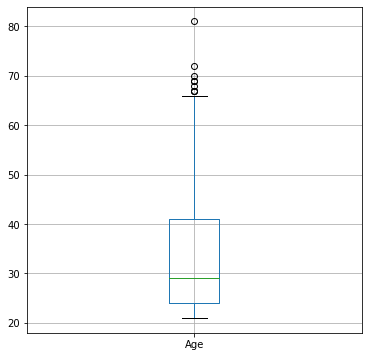

In [113]:
plt.figure(1, figsize=(6,6))
df.boxplot(column = "Age")

<AxesSubplot:xlabel='Outcome', ylabel='count'>

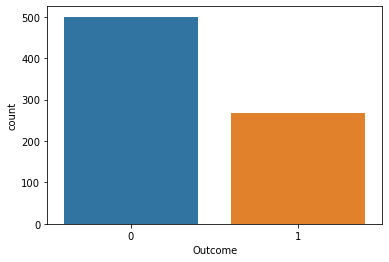

In [114]:
sns.countplot(x='Outcome',data=df)

In [115]:
df.Age.value_counts()

22    72
21    63
25    48
24    46
23    38
28    35
26    33
27    32
29    29
31    24
41    22
30    21
37    19
42    18
33    17
38    16
36    16
32    16
45    15
34    14
40    13
43    13
46    13
39    12
35    10
52     8
44     8
50     8
51     8
58     7
54     6
47     6
53     5
60     5
49     5
57     5
48     5
66     4
62     4
63     4
55     4
59     3
56     3
65     3
67     3
61     2
69     2
64     1
68     1
70     1
72     1
81     1
Name: Age, dtype: int64

## Corelation

In [120]:
corr_matrix = df.corr()

In [121]:
Outcome_corr = corr_matrix['Outcome']
Outcome_corr.iloc[Outcome_corr.abs().argsort()]

BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
DiabetesPedigreeFunction    0.173844
Pregnancies                 0.221898
Age                         0.238356
BMI                         0.292695
Glucose                     0.466581
Outcome                     1.000000
Name: Outcome, dtype: float64

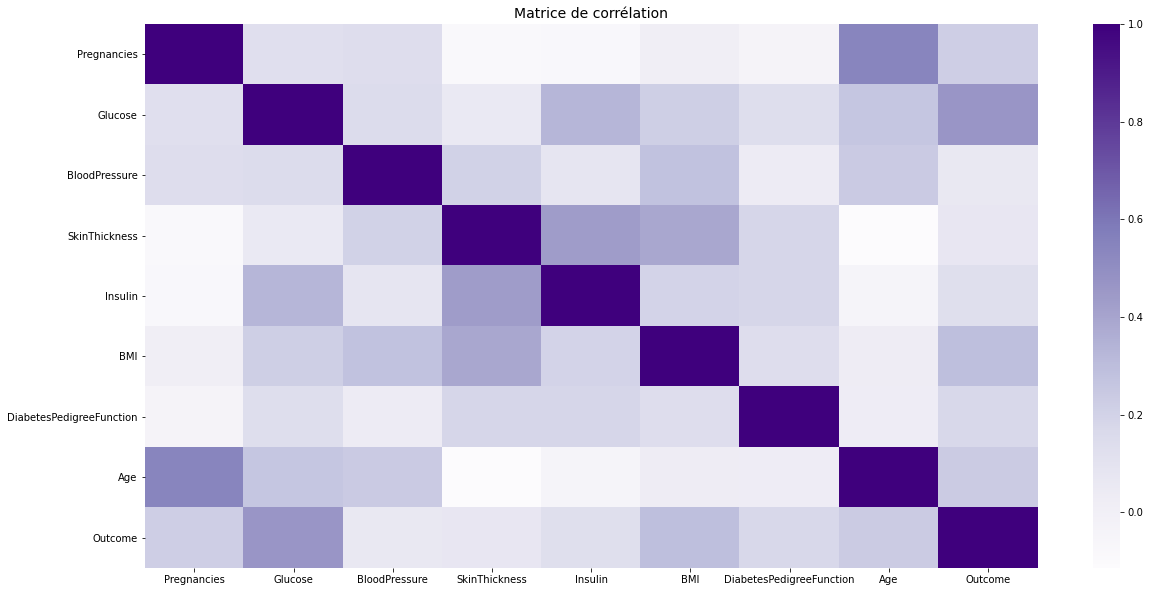

In [122]:
fig, ax = plt.subplots(figsize=(20,10))         

# Imbalanced DataFrame Correlation
corr = df.corr()
sns.heatmap(corr, cmap='Purples', annot_kws={'size':30}, ax=ax)
ax.set_title("Matrice de corrélation", fontsize=14)

plt.show()

## Préparation des données

In [170]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
array = df.values
# separate array into input and output components
X = array[:,0:8]
Y = array[:,8]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX = scaler.fit_transform(X)
# summarize transformed data
set_printoptions(precision=3)

In [171]:
print(rescaledX[0:5,:])

[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


In [172]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)
# summarize transformed data
set_printoptions(precision=3)
print(normalizedX[0:5,:])

[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


In [173]:
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[ 111.52  1411.887   17.605   53.108 2175.565  127.669    5.393  181.304]
[[148.    0.   33.6  50. ]
 [ 85.    0.   26.6  31. ]
 [183.    0.   23.3  32. ]
 [ 89.   94.   28.1  21. ]
 [137.  168.   43.1  33. ]]


In [174]:
import tensorflow as tf
from tensorflow import keras

In [175]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.20, random_state= 0)
print("Les données de test et de train ce présentent comme:")
print("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

Les données de test et de train ce présentent comme:
X_train:  614
X_test:  154
y_train:  614
y_test:  154


# Modèle

In [231]:
model = keras.Sequential([
    keras.layers.Dense(12, input_dim=8, activation='relu'),
    
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train, validation_split=0.10,
                    epochs=500, batch_size=32)


Epoch 1/500
18/18 [==============================] - 0s 8ms/step - loss: 15.2642 - accuracy: 0.4874 - val_loss: 13.6730 - val_accuracy: 0.4677
Epoch 2/500
18/18 [==============================] - 0s 2ms/step - loss: 12.2807 - accuracy: 0.5039 - val_loss: 10.5368 - val_accuracy: 0.5484
Epoch 3/500
18/18 [==============================] - 0s 3ms/step - loss: 9.1153 - accuracy: 0.5243 - val_loss: 7.5757 - val_accuracy: 0.5484
Epoch 4/500
18/18 [==============================] - 0s 3ms/step - loss: 6.4984 - accuracy: 0.5567 - val_loss: 5.2234 - val_accuracy: 0.5968
Epoch 5/500
18/18 [==============================] - 0s 3ms/step - loss: 5.0441 - accuracy: 0.5578 - val_loss: 3.6368 - val_accuracy: 0.5161
Epoch 6/500
18/18 [==============================] - 0s 3ms/step - loss: 3.7035 - accuracy: 0.5684 - val_loss: 3.1581 - val_accuracy: 0.5161
Epoch 7/500
18/18 [==============================] - 0s 3ms/step - loss: 2.7063 - accuracy: 0.6222 - val_loss: 2.8034 - val_accuracy: 0.5323
Epoch 8/5

Epoch 59/500
18/18 [==============================] - 0s 3ms/step - loss: 0.7045 - accuracy: 0.6766 - val_loss: 0.8941 - val_accuracy: 0.6613
Epoch 60/500
18/18 [==============================] - 0s 2ms/step - loss: 0.6711 - accuracy: 0.6998 - val_loss: 0.8721 - val_accuracy: 0.6290
Epoch 61/500
18/18 [==============================] - 0s 3ms/step - loss: 0.7033 - accuracy: 0.6706 - val_loss: 0.9030 - val_accuracy: 0.6774
Epoch 62/500
18/18 [==============================] - 0s 3ms/step - loss: 0.6437 - accuracy: 0.6845 - val_loss: 0.8697 - val_accuracy: 0.6774
Epoch 63/500
18/18 [==============================] - 0s 3ms/step - loss: 0.6934 - accuracy: 0.6556 - val_loss: 0.8921 - val_accuracy: 0.6774
Epoch 64/500
18/18 [==============================] - 0s 3ms/step - loss: 0.6364 - accuracy: 0.6800 - val_loss: 0.8569 - val_accuracy: 0.6613
Epoch 65/500
18/18 [==============================] - 0s 2ms/step - loss: 0.6514 - accuracy: 0.6739 - val_loss: 0.8563 - val_accuracy: 0.6774
Epoch 

18/18 [==============================] - 0s 2ms/step - loss: 0.6246 - accuracy: 0.7078 - val_loss: 0.7195 - val_accuracy: 0.7419
Epoch 117/500
18/18 [==============================] - 0s 3ms/step - loss: 0.5923 - accuracy: 0.7091 - val_loss: 0.6701 - val_accuracy: 0.6613
Epoch 118/500
18/18 [==============================] - 0s 3ms/step - loss: 0.5595 - accuracy: 0.7372 - val_loss: 0.6743 - val_accuracy: 0.6290
Epoch 119/500
18/18 [==============================] - 0s 2ms/step - loss: 0.5902 - accuracy: 0.6999 - val_loss: 0.6724 - val_accuracy: 0.7097
Epoch 120/500
18/18 [==============================] - 0s 2ms/step - loss: 0.5659 - accuracy: 0.6975 - val_loss: 0.6676 - val_accuracy: 0.6774
Epoch 121/500
18/18 [==============================] - 0s 2ms/step - loss: 0.6235 - accuracy: 0.6932 - val_loss: 0.6546 - val_accuracy: 0.7258
Epoch 122/500
18/18 [==============================] - 0s 2ms/step - loss: 0.5416 - accuracy: 0.7272 - val_loss: 0.6917 - val_accuracy: 0.7258
Epoch 123/500

18/18 [==============================] - 0s 2ms/step - loss: 0.5207 - accuracy: 0.7254 - val_loss: 0.6044 - val_accuracy: 0.6774
Epoch 174/500
18/18 [==============================] - 0s 2ms/step - loss: 0.5541 - accuracy: 0.7087 - val_loss: 0.6030 - val_accuracy: 0.6774
Epoch 175/500
18/18 [==============================] - 0s 2ms/step - loss: 0.5587 - accuracy: 0.7130 - val_loss: 0.6190 - val_accuracy: 0.7097
Epoch 176/500
18/18 [==============================] - 0s 2ms/step - loss: 0.5240 - accuracy: 0.7300 - val_loss: 0.6289 - val_accuracy: 0.6613
Epoch 177/500
18/18 [==============================] - 0s 2ms/step - loss: 0.5741 - accuracy: 0.7174 - val_loss: 0.6496 - val_accuracy: 0.7581
Epoch 178/500
18/18 [==============================] - 0s 2ms/step - loss: 0.5913 - accuracy: 0.6778 - val_loss: 0.6044 - val_accuracy: 0.7097
Epoch 179/500
18/18 [==============================] - 0s 3ms/step - loss: 0.5411 - accuracy: 0.7221 - val_loss: 0.6030 - val_accuracy: 0.6935
Epoch 180/500

18/18 [==============================] - 0s 2ms/step - loss: 0.5181 - accuracy: 0.7282 - val_loss: 0.6245 - val_accuracy: 0.7581
Epoch 231/500
18/18 [==============================] - 0s 2ms/step - loss: 0.5220 - accuracy: 0.7279 - val_loss: 0.6112 - val_accuracy: 0.7581
Epoch 232/500
18/18 [==============================] - 0s 3ms/step - loss: 0.5205 - accuracy: 0.7420 - val_loss: 0.6006 - val_accuracy: 0.7258
Epoch 233/500
18/18 [==============================] - 0s 2ms/step - loss: 0.5473 - accuracy: 0.7151 - val_loss: 0.5889 - val_accuracy: 0.6935
Epoch 234/500
18/18 [==============================] - 0s 2ms/step - loss: 0.5484 - accuracy: 0.7217 - val_loss: 0.7001 - val_accuracy: 0.7258
Epoch 235/500
18/18 [==============================] - 0s 3ms/step - loss: 0.5765 - accuracy: 0.7153 - val_loss: 0.5873 - val_accuracy: 0.7581
Epoch 236/500
18/18 [==============================] - 0s 2ms/step - loss: 0.5633 - accuracy: 0.7153 - val_loss: 0.6050 - val_accuracy: 0.6774
Epoch 237/500

18/18 [==============================] - 0s 3ms/step - loss: 0.5085 - accuracy: 0.7423 - val_loss: 0.5838 - val_accuracy: 0.7258
Epoch 288/500
18/18 [==============================] - 0s 3ms/step - loss: 0.5451 - accuracy: 0.7139 - val_loss: 0.5699 - val_accuracy: 0.7258
Epoch 289/500
18/18 [==============================] - 0s 3ms/step - loss: 0.5063 - accuracy: 0.7380 - val_loss: 0.6433 - val_accuracy: 0.7419
Epoch 290/500
18/18 [==============================] - 0s 2ms/step - loss: 0.5601 - accuracy: 0.7128 - val_loss: 0.5715 - val_accuracy: 0.7097
Epoch 291/500
18/18 [==============================] - 0s 3ms/step - loss: 0.5445 - accuracy: 0.7217 - val_loss: 0.6536 - val_accuracy: 0.6935
Epoch 292/500
18/18 [==============================] - 0s 2ms/step - loss: 0.5349 - accuracy: 0.7760 - val_loss: 0.6541 - val_accuracy: 0.7419
Epoch 293/500
18/18 [==============================] - 0s 3ms/step - loss: 0.5291 - accuracy: 0.7368 - val_loss: 0.5784 - val_accuracy: 0.7419
Epoch 294/500

18/18 [==============================] - 0s 3ms/step - loss: 0.5390 - accuracy: 0.7222 - val_loss: 0.5792 - val_accuracy: 0.7742
Epoch 345/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4969 - accuracy: 0.7428 - val_loss: 0.5766 - val_accuracy: 0.6935
Epoch 346/500
18/18 [==============================] - 0s 2ms/step - loss: 0.5011 - accuracy: 0.7642 - val_loss: 0.5554 - val_accuracy: 0.7258
Epoch 347/500
18/18 [==============================] - 0s 2ms/step - loss: 0.5173 - accuracy: 0.7576 - val_loss: 0.5634 - val_accuracy: 0.7742
Epoch 348/500
18/18 [==============================] - 0s 3ms/step - loss: 0.5039 - accuracy: 0.7261 - val_loss: 0.5583 - val_accuracy: 0.7258
Epoch 349/500
18/18 [==============================] - 0s 3ms/step - loss: 0.5409 - accuracy: 0.7244 - val_loss: 0.5518 - val_accuracy: 0.6935
Epoch 350/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4936 - accuracy: 0.7549 - val_loss: 0.6113 - val_accuracy: 0.7581
Epoch 351/500

18/18 [==============================] - 0s 2ms/step - loss: 0.5057 - accuracy: 0.7308 - val_loss: 0.6283 - val_accuracy: 0.7581
Epoch 402/500
18/18 [==============================] - 0s 3ms/step - loss: 0.5015 - accuracy: 0.7409 - val_loss: 0.6341 - val_accuracy: 0.7742
Epoch 403/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4689 - accuracy: 0.7782 - val_loss: 0.6318 - val_accuracy: 0.7097
Epoch 404/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4910 - accuracy: 0.7454 - val_loss: 0.6394 - val_accuracy: 0.7419
Epoch 405/500
18/18 [==============================] - 0s 3ms/step - loss: 0.5018 - accuracy: 0.7422 - val_loss: 0.7127 - val_accuracy: 0.7419
Epoch 406/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4812 - accuracy: 0.7806 - val_loss: 0.6542 - val_accuracy: 0.7258
Epoch 407/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4807 - accuracy: 0.7534 - val_loss: 0.6305 - val_accuracy: 0.7258
Epoch 408/500

18/18 [==============================] - 0s 2ms/step - loss: 0.5474 - accuracy: 0.7256 - val_loss: 0.6922 - val_accuracy: 0.7581
Epoch 459/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4903 - accuracy: 0.7604 - val_loss: 0.6857 - val_accuracy: 0.7742
Epoch 460/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4843 - accuracy: 0.7577 - val_loss: 0.6882 - val_accuracy: 0.7742
Epoch 461/500
18/18 [==============================] - 0s 2ms/step - loss: 0.5440 - accuracy: 0.7175 - val_loss: 0.6489 - val_accuracy: 0.7742
Epoch 462/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4881 - accuracy: 0.7605 - val_loss: 0.6565 - val_accuracy: 0.7742
Epoch 463/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4888 - accuracy: 0.7585 - val_loss: 0.6890 - val_accuracy: 0.7581
Epoch 464/500
18/18 [==============================] - 0s 2ms/step - loss: 0.5223 - accuracy: 0.7448 - val_loss: 0.6527 - val_accuracy: 0.7419
Epoch 465/500

In [189]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

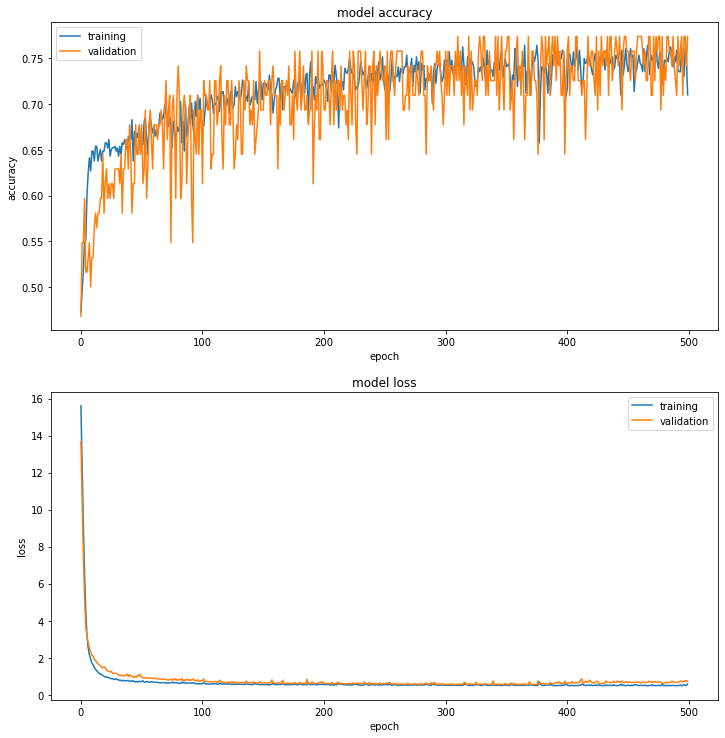

In [232]:
def display_training_curves(training, validation, title, subplot):
  ax = plt.subplot(subplot)
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['training', 'validation'])

plt.subplots(figsize=(10,10))
plt.tight_layout()
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'accuracy', 211)
display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 212)

In [226]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 664us/step - loss: 0.5435 - accuracy: 0.7403


[0.5434938669204712, 0.7402597665786743]

In [224]:
model = keras.Sequential([
    keras.layers.Dense(12, input_dim=8, activation= 'relu' ),
    keras.layers.Dense(8, activation= 'relu' ),
    keras.layers.Dense(1, activation = 'sigmoid')
])
#tb_callbaks=tf.keras.callbacks.TensorBoard(log_dir="logs/adam",histogram_freq = 1)
model.compile(optimizer = 'adam', 
             loss = 'binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train, validation_split=0.10,
                    epochs=500,, batch_size=32)

Epoch 1/300
18/18 [==============================] - 0s 7ms/step - loss: 5.7157 - accuracy: 0.5423 - val_loss: 3.1350 - val_accuracy: 0.4839
Epoch 2/300
18/18 [==============================] - 0s 2ms/step - loss: 2.5857 - accuracy: 0.5014 - val_loss: 1.6687 - val_accuracy: 0.6129
Epoch 3/300
18/18 [==============================] - 0s 3ms/step - loss: 1.6960 - accuracy: 0.5435 - val_loss: 1.4467 - val_accuracy: 0.5645
Epoch 4/300
18/18 [==============================] - 0s 3ms/step - loss: 1.3205 - accuracy: 0.5825 - val_loss: 1.3277 - val_accuracy: 0.5323
Epoch 5/300
18/18 [==============================] - 0s 3ms/step - loss: 1.1681 - accuracy: 0.5810 - val_loss: 1.2220 - val_accuracy: 0.5645
Epoch 6/300
18/18 [==============================] - 0s 2ms/step - loss: 1.1492 - accuracy: 0.6064 - val_loss: 1.1366 - val_accuracy: 0.5806
Epoch 7/300
18/18 [==============================] - 0s 3ms/step - loss: 1.0272 - accuracy: 0.6119 - val_loss: 1.0544 - val_accuracy: 0.5968
Epoch 8/300
1

Epoch 59/300
18/18 [==============================] - 0s 3ms/step - loss: 0.5590 - accuracy: 0.7292 - val_loss: 0.5918 - val_accuracy: 0.6774
Epoch 60/300
18/18 [==============================] - 0s 3ms/step - loss: 0.5598 - accuracy: 0.7262 - val_loss: 0.5939 - val_accuracy: 0.6613
Epoch 61/300
18/18 [==============================] - 0s 2ms/step - loss: 0.5870 - accuracy: 0.6942 - val_loss: 0.5895 - val_accuracy: 0.6935
Epoch 62/300
18/18 [==============================] - 0s 2ms/step - loss: 0.5666 - accuracy: 0.7300 - val_loss: 0.6022 - val_accuracy: 0.6290
Epoch 63/300
18/18 [==============================] - 0s 2ms/step - loss: 0.5806 - accuracy: 0.7349 - val_loss: 0.5792 - val_accuracy: 0.7097
Epoch 64/300
18/18 [==============================] - 0s 2ms/step - loss: 0.5502 - accuracy: 0.7294 - val_loss: 0.6119 - val_accuracy: 0.5968
Epoch 65/300
18/18 [==============================] - 0s 2ms/step - loss: 0.5804 - accuracy: 0.6992 - val_loss: 0.5674 - val_accuracy: 0.7258
Epoch 

18/18 [==============================] - 0s 2ms/step - loss: 0.5386 - accuracy: 0.7274 - val_loss: 0.5799 - val_accuracy: 0.7097
Epoch 117/300
18/18 [==============================] - 0s 2ms/step - loss: 0.5427 - accuracy: 0.7356 - val_loss: 0.5782 - val_accuracy: 0.6774
Epoch 118/300
18/18 [==============================] - 0s 3ms/step - loss: 0.5411 - accuracy: 0.7325 - val_loss: 0.5664 - val_accuracy: 0.7097
Epoch 119/300
18/18 [==============================] - 0s 3ms/step - loss: 0.5435 - accuracy: 0.7241 - val_loss: 0.5739 - val_accuracy: 0.6935
Epoch 120/300
18/18 [==============================] - 0s 2ms/step - loss: 0.5263 - accuracy: 0.7488 - val_loss: 0.6004 - val_accuracy: 0.6613
Epoch 121/300
18/18 [==============================] - 0s 3ms/step - loss: 0.5667 - accuracy: 0.7329 - val_loss: 0.5860 - val_accuracy: 0.6774
Epoch 122/300
18/18 [==============================] - 0s 3ms/step - loss: 0.5131 - accuracy: 0.7510 - val_loss: 0.5918 - val_accuracy: 0.6774
Epoch 123/300

18/18 [==============================] - 0s 3ms/step - loss: 0.5502 - accuracy: 0.7523 - val_loss: 0.6338 - val_accuracy: 0.6290
Epoch 174/300
18/18 [==============================] - 0s 3ms/step - loss: 0.5187 - accuracy: 0.7559 - val_loss: 0.5961 - val_accuracy: 0.7097
Epoch 175/300
18/18 [==============================] - 0s 3ms/step - loss: 0.4858 - accuracy: 0.7612 - val_loss: 0.6155 - val_accuracy: 0.6452
Epoch 176/300
18/18 [==============================] - 0s 3ms/step - loss: 0.5401 - accuracy: 0.7206 - val_loss: 0.6148 - val_accuracy: 0.6290
Epoch 177/300
18/18 [==============================] - 0s 3ms/step - loss: 0.4879 - accuracy: 0.7780 - val_loss: 0.6022 - val_accuracy: 0.6774
Epoch 178/300
18/18 [==============================] - 0s 3ms/step - loss: 0.4974 - accuracy: 0.7637 - val_loss: 0.6110 - val_accuracy: 0.6290
Epoch 179/300
18/18 [==============================] - 0s 3ms/step - loss: 0.4975 - accuracy: 0.7708 - val_loss: 0.6053 - val_accuracy: 0.6774
Epoch 180/300

18/18 [==============================] - 0s 3ms/step - loss: 0.5276 - accuracy: 0.7512 - val_loss: 0.6531 - val_accuracy: 0.6129
Epoch 231/300
18/18 [==============================] - 0s 2ms/step - loss: 0.4645 - accuracy: 0.7981 - val_loss: 0.6101 - val_accuracy: 0.7258
Epoch 232/300
18/18 [==============================] - 0s 2ms/step - loss: 0.4938 - accuracy: 0.7758 - val_loss: 0.6405 - val_accuracy: 0.6290
Epoch 233/300
18/18 [==============================] - 0s 2ms/step - loss: 0.5028 - accuracy: 0.7659 - val_loss: 0.6093 - val_accuracy: 0.7258
Epoch 234/300
18/18 [==============================] - 0s 3ms/step - loss: 0.5084 - accuracy: 0.7454 - val_loss: 0.6423 - val_accuracy: 0.6935
Epoch 235/300
18/18 [==============================] - 0s 3ms/step - loss: 0.4938 - accuracy: 0.7857 - val_loss: 0.6563 - val_accuracy: 0.6129
Epoch 236/300
18/18 [==============================] - 0s 2ms/step - loss: 0.5005 - accuracy: 0.7587 - val_loss: 0.6442 - val_accuracy: 0.6452
Epoch 237/300

18/18 [==============================] - 0s 3ms/step - loss: 0.5026 - accuracy: 0.7589 - val_loss: 0.6492 - val_accuracy: 0.6935
Epoch 288/300
18/18 [==============================] - 0s 3ms/step - loss: 0.4832 - accuracy: 0.7854 - val_loss: 0.6836 - val_accuracy: 0.6290
Epoch 289/300
18/18 [==============================] - 0s 3ms/step - loss: 0.4787 - accuracy: 0.7650 - val_loss: 0.6557 - val_accuracy: 0.6774
Epoch 290/300
18/18 [==============================] - 0s 2ms/step - loss: 0.4675 - accuracy: 0.7871 - val_loss: 0.6592 - val_accuracy: 0.6452
Epoch 291/300
18/18 [==============================] - 0s 3ms/step - loss: 0.4573 - accuracy: 0.7975 - val_loss: 0.6656 - val_accuracy: 0.6613
Epoch 292/300
18/18 [==============================] - 0s 3ms/step - loss: 0.4428 - accuracy: 0.7941 - val_loss: 0.6696 - val_accuracy: 0.6613
Epoch 293/300
18/18 [==============================] - 0s 2ms/step - loss: 0.4672 - accuracy: 0.7901 - val_loss: 0.6575 - val_accuracy: 0.6452
Epoch 294/300

In [182]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

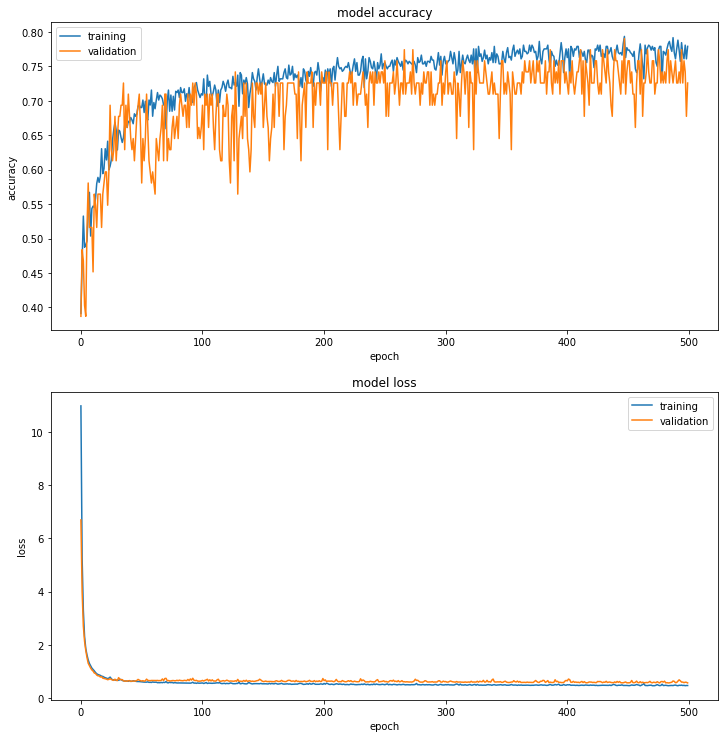

In [223]:
def display_training_curves(training, validation, title, subplot):
  ax = plt.subplot(subplot)
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['training', 'validation'])

plt.subplots(figsize=(10,10))
plt.tight_layout()
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'accuracy', 211)
display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 212)

In [212]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 1ms/step - loss: 0.5650 - accuracy: 0.7013


[0.5649735927581787, 0.701298713684082]

In [214]:
yp = model.predict(X_test)
yp[:5]

array([[0.416],
       [0.123],
       [0.219],
       [0.825],
       [0.387]], dtype=float32)

In [262]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [263]:
y_pred[:10]

[0, 0, 0, 1, 0, 0, 1, 1, 0, 0]

In [264]:
y_test[:10]

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 0.])

# Confusion matrice

In [265]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.91      0.81       107
         1.0       0.52      0.23      0.32        47

    accuracy                           0.70       154
   macro avg       0.63      0.57      0.57       154
weighted avg       0.67      0.70      0.66       154



Text(69.0, 0.5, 'Truth')

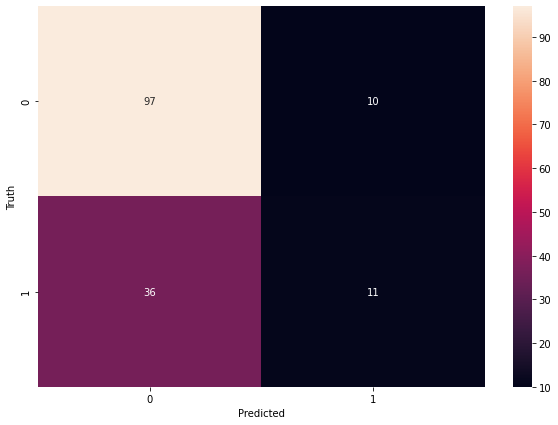

In [266]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')



## Scaler data

In [254]:
X_train, X_test, y_train, y_test = train_test_split(rescaledX, Y, test_size= 0.20, random_state= 0)
print("Les données de test et de train ce présentent comme:")
print("X_train: ", len(X_train))
print("X_test: ", len(X_test))
print("y_train: ", len(y_train))
print("y_test: ", len(y_test))

Les données de test et de train ce présentent comme:
X_train:  614
X_test:  154
y_train:  614
y_test:  154


In [255]:
model = keras.Sequential([
    keras.layers.Dense(12, input_dim=8, activation='relu'),
    
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train, validation_split=0.10,
                    epochs=500, batch_size=32)


Epoch 1/500
18/18 [==============================] - 0s 8ms/step - loss: 0.7089 - accuracy: 0.5984 - val_loss: 0.6545 - val_accuracy: 0.6935
Epoch 2/500
18/18 [==============================] - 0s 2ms/step - loss: 0.6861 - accuracy: 0.6269 - val_loss: 0.6516 - val_accuracy: 0.6935
Epoch 3/500
18/18 [==============================] - 0s 3ms/step - loss: 0.6793 - accuracy: 0.6297 - val_loss: 0.6463 - val_accuracy: 0.6935
Epoch 4/500
18/18 [==============================] - 0s 3ms/step - loss: 0.6738 - accuracy: 0.6406 - val_loss: 0.6429 - val_accuracy: 0.6935
Epoch 5/500
18/18 [==============================] - 0s 3ms/step - loss: 0.6740 - accuracy: 0.6365 - val_loss: 0.6412 - val_accuracy: 0.6935
Epoch 6/500
18/18 [==============================] - 0s 2ms/step - loss: 0.6695 - accuracy: 0.6335 - val_loss: 0.6399 - val_accuracy: 0.6935
Epoch 7/500
18/18 [==============================] - 0s 3ms/step - loss: 0.6685 - accuracy: 0.6312 - val_loss: 0.6378 - val_accuracy: 0.6935
Epoch 8/500
1

Epoch 59/500
18/18 [==============================] - 0s 3ms/step - loss: 0.5683 - accuracy: 0.6998 - val_loss: 0.5356 - val_accuracy: 0.7742
Epoch 60/500
18/18 [==============================] - 0s 3ms/step - loss: 0.5623 - accuracy: 0.7151 - val_loss: 0.5350 - val_accuracy: 0.7258
Epoch 61/500
18/18 [==============================] - 0s 3ms/step - loss: 0.5626 - accuracy: 0.6943 - val_loss: 0.5339 - val_accuracy: 0.7258
Epoch 62/500
18/18 [==============================] - 0s 2ms/step - loss: 0.5405 - accuracy: 0.7463 - val_loss: 0.5320 - val_accuracy: 0.7419
Epoch 63/500
18/18 [==============================] - 0s 3ms/step - loss: 0.5457 - accuracy: 0.7288 - val_loss: 0.5307 - val_accuracy: 0.7258
Epoch 64/500
18/18 [==============================] - 0s 2ms/step - loss: 0.5340 - accuracy: 0.7475 - val_loss: 0.5296 - val_accuracy: 0.7258
Epoch 65/500
18/18 [==============================] - 0s 2ms/step - loss: 0.5193 - accuracy: 0.7418 - val_loss: 0.5282 - val_accuracy: 0.7581
Epoch 

18/18 [==============================] - 0s 2ms/step - loss: 0.4750 - accuracy: 0.8023 - val_loss: 0.4855 - val_accuracy: 0.7258
Epoch 117/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4896 - accuracy: 0.7830 - val_loss: 0.4847 - val_accuracy: 0.7419
Epoch 118/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4986 - accuracy: 0.7644 - val_loss: 0.4848 - val_accuracy: 0.7419
Epoch 119/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4961 - accuracy: 0.7787 - val_loss: 0.4847 - val_accuracy: 0.7581
Epoch 120/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4949 - accuracy: 0.7740 - val_loss: 0.4838 - val_accuracy: 0.7419
Epoch 121/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4829 - accuracy: 0.7781 - val_loss: 0.4836 - val_accuracy: 0.7581
Epoch 122/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.7585 - val_loss: 0.4822 - val_accuracy: 0.7419
Epoch 123/500

18/18 [==============================] - 0s 2ms/step - loss: 0.4914 - accuracy: 0.7600 - val_loss: 0.4725 - val_accuracy: 0.7419
Epoch 174/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4810 - accuracy: 0.7783 - val_loss: 0.4748 - val_accuracy: 0.7903
Epoch 175/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4637 - accuracy: 0.7703 - val_loss: 0.4734 - val_accuracy: 0.7581
Epoch 176/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4495 - accuracy: 0.7945 - val_loss: 0.4727 - val_accuracy: 0.7581
Epoch 177/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4520 - accuracy: 0.8102 - val_loss: 0.4730 - val_accuracy: 0.7581
Epoch 178/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4599 - accuracy: 0.7797 - val_loss: 0.4727 - val_accuracy: 0.7581
Epoch 179/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4758 - accuracy: 0.7755 - val_loss: 0.4728 - val_accuracy: 0.7581
Epoch 180/500

18/18 [==============================] - 0s 3ms/step - loss: 0.4779 - accuracy: 0.7699 - val_loss: 0.4721 - val_accuracy: 0.7419
Epoch 231/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4399 - accuracy: 0.8095 - val_loss: 0.4734 - val_accuracy: 0.7581
Epoch 232/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4707 - accuracy: 0.7869 - val_loss: 0.4724 - val_accuracy: 0.7581
Epoch 233/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4687 - accuracy: 0.7744 - val_loss: 0.4723 - val_accuracy: 0.7581
Epoch 234/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4805 - accuracy: 0.7715 - val_loss: 0.4723 - val_accuracy: 0.7581
Epoch 235/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4681 - accuracy: 0.7962 - val_loss: 0.4738 - val_accuracy: 0.7419
Epoch 236/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.8185 - val_loss: 0.4718 - val_accuracy: 0.7742
Epoch 237/500

18/18 [==============================] - 0s 2ms/step - loss: 0.4697 - accuracy: 0.7718 - val_loss: 0.4752 - val_accuracy: 0.7742
Epoch 288/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4642 - accuracy: 0.7666 - val_loss: 0.4755 - val_accuracy: 0.7903
Epoch 289/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4477 - accuracy: 0.7820 - val_loss: 0.4760 - val_accuracy: 0.7903
Epoch 290/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4341 - accuracy: 0.7821 - val_loss: 0.4740 - val_accuracy: 0.7742
Epoch 291/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4304 - accuracy: 0.8009 - val_loss: 0.4752 - val_accuracy: 0.7903
Epoch 292/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4360 - accuracy: 0.8142 - val_loss: 0.4777 - val_accuracy: 0.7903
Epoch 293/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4326 - accuracy: 0.7924 - val_loss: 0.4751 - val_accuracy: 0.7903
Epoch 294/500

18/18 [==============================] - 0s 2ms/step - loss: 0.4388 - accuracy: 0.7917 - val_loss: 0.4781 - val_accuracy: 0.8065
Epoch 345/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4570 - accuracy: 0.7750 - val_loss: 0.4828 - val_accuracy: 0.7903
Epoch 346/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4513 - accuracy: 0.7794 - val_loss: 0.4786 - val_accuracy: 0.8065
Epoch 347/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4681 - accuracy: 0.7847 - val_loss: 0.4779 - val_accuracy: 0.8065
Epoch 348/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4302 - accuracy: 0.7864 - val_loss: 0.4789 - val_accuracy: 0.8065
Epoch 349/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.7838 - val_loss: 0.4787 - val_accuracy: 0.8065
Epoch 350/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4195 - accuracy: 0.8030 - val_loss: 0.4797 - val_accuracy: 0.7903
Epoch 351/500

18/18 [==============================] - 0s 2ms/step - loss: 0.4246 - accuracy: 0.7993 - val_loss: 0.4811 - val_accuracy: 0.8065
Epoch 402/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4572 - accuracy: 0.7740 - val_loss: 0.4814 - val_accuracy: 0.8065
Epoch 403/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4363 - accuracy: 0.7871 - val_loss: 0.4830 - val_accuracy: 0.8065
Epoch 404/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4637 - accuracy: 0.7699 - val_loss: 0.4820 - val_accuracy: 0.8065
Epoch 405/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4261 - accuracy: 0.7810 - val_loss: 0.4827 - val_accuracy: 0.8065
Epoch 406/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4504 - accuracy: 0.7717 - val_loss: 0.4811 - val_accuracy: 0.7903
Epoch 407/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4433 - accuracy: 0.7857 - val_loss: 0.4814 - val_accuracy: 0.7903
Epoch 408/500

18/18 [==============================] - 0s 3ms/step - loss: 0.4382 - accuracy: 0.7876 - val_loss: 0.4840 - val_accuracy: 0.8065
Epoch 459/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4705 - accuracy: 0.7695 - val_loss: 0.4836 - val_accuracy: 0.8065
Epoch 460/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4616 - accuracy: 0.7919 - val_loss: 0.4838 - val_accuracy: 0.8065
Epoch 461/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4694 - accuracy: 0.7673 - val_loss: 0.4845 - val_accuracy: 0.8065
Epoch 462/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4425 - accuracy: 0.7886 - val_loss: 0.4845 - val_accuracy: 0.8065
Epoch 463/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4414 - accuracy: 0.7707 - val_loss: 0.4860 - val_accuracy: 0.8065
Epoch 464/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4296 - accuracy: 0.7845 - val_loss: 0.4838 - val_accuracy: 0.8065
Epoch 465/500

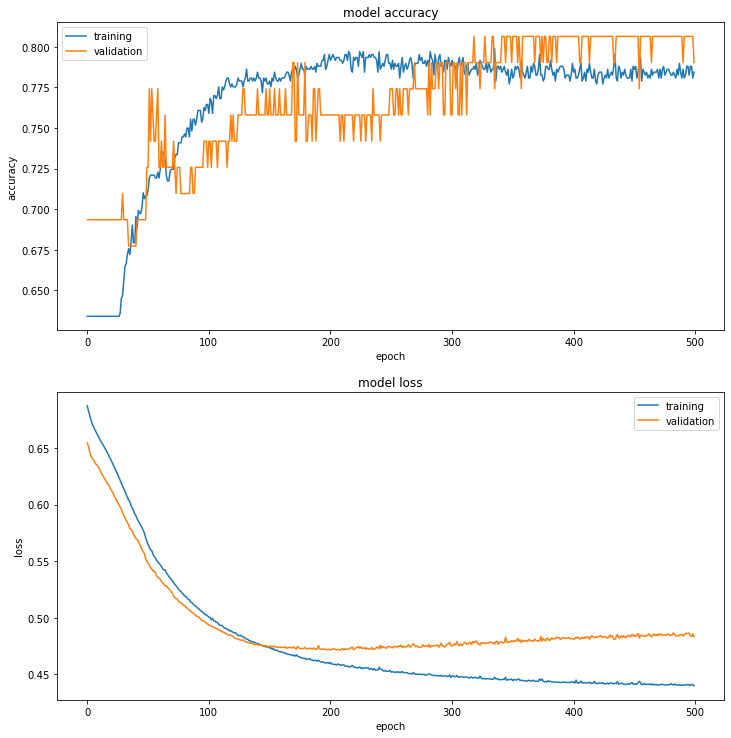

In [256]:
def display_training_curves(training, validation, title, subplot):
  ax = plt.subplot(subplot)
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['training', 'validation'])

plt.subplots(figsize=(10,10))
plt.tight_layout()
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'accuracy', 211)
display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 212)

In [258]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 1ms/step - loss: 0.4434 - accuracy: 0.7857


[0.44343170523643494, 0.7857142686843872]

In [259]:
model = keras.Sequential([
    keras.layers.Dense(12, input_dim=8, activation= 'relu' ),
    keras.layers.Dense(8, activation= 'relu' ),
    keras.layers.Dense(1, activation = 'sigmoid')
])
#tb_callbaks=tf.keras.callbacks.TensorBoard(log_dir="logs/adam",histogram_freq = 1)
model.compile(optimizer = 'adam', 
             loss = 'binary_crossentropy',
              metrics=['accuracy'])
history = model.fit(X_train,y_train, validation_split=0.10,
                    epochs=500, batch_size=32)

Epoch 1/500
18/18 [==============================] - 0s 7ms/step - loss: 0.6938 - accuracy: 0.6250 - val_loss: 0.6602 - val_accuracy: 0.6935
Epoch 2/500
18/18 [==============================] - 0s 2ms/step - loss: 0.6764 - accuracy: 0.6427 - val_loss: 0.6523 - val_accuracy: 0.6935
Epoch 3/500
18/18 [==============================] - 0s 3ms/step - loss: 0.6805 - accuracy: 0.6288 - val_loss: 0.6442 - val_accuracy: 0.6935
Epoch 4/500
18/18 [==============================] - 0s 2ms/step - loss: 0.6685 - accuracy: 0.6271 - val_loss: 0.6383 - val_accuracy: 0.6935
Epoch 5/500
18/18 [==============================] - 0s 3ms/step - loss: 0.6682 - accuracy: 0.6229 - val_loss: 0.6340 - val_accuracy: 0.6935
Epoch 6/500
18/18 [==============================] - 0s 2ms/step - loss: 0.6429 - accuracy: 0.6655 - val_loss: 0.6297 - val_accuracy: 0.6935
Epoch 7/500
18/18 [==============================] - 0s 3ms/step - loss: 0.6409 - accuracy: 0.6480 - val_loss: 0.6275 - val_accuracy: 0.6935
Epoch 8/500
1

Epoch 59/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4802 - accuracy: 0.7640 - val_loss: 0.4877 - val_accuracy: 0.7742
Epoch 60/500
18/18 [==============================] - 0s 3ms/step - loss: 0.5030 - accuracy: 0.7596 - val_loss: 0.4872 - val_accuracy: 0.7903
Epoch 61/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4738 - accuracy: 0.7887 - val_loss: 0.4839 - val_accuracy: 0.7581
Epoch 62/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4886 - accuracy: 0.7744 - val_loss: 0.4833 - val_accuracy: 0.7903
Epoch 63/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4829 - accuracy: 0.7726 - val_loss: 0.4832 - val_accuracy: 0.7903
Epoch 64/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4653 - accuracy: 0.7801 - val_loss: 0.4817 - val_accuracy: 0.7742
Epoch 65/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4736 - accuracy: 0.7752 - val_loss: 0.4830 - val_accuracy: 0.7903
Epoch 

18/18 [==============================] - 0s 3ms/step - loss: 0.4702 - accuracy: 0.7621 - val_loss: 0.4662 - val_accuracy: 0.7903
Epoch 117/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4525 - accuracy: 0.7762 - val_loss: 0.4653 - val_accuracy: 0.7903
Epoch 118/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4635 - accuracy: 0.7672 - val_loss: 0.4647 - val_accuracy: 0.7903
Epoch 119/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4622 - accuracy: 0.7740 - val_loss: 0.4607 - val_accuracy: 0.7903
Epoch 120/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4798 - accuracy: 0.7678 - val_loss: 0.4689 - val_accuracy: 0.7903
Epoch 121/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4306 - accuracy: 0.7910 - val_loss: 0.4654 - val_accuracy: 0.7903
Epoch 122/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4516 - accuracy: 0.7689 - val_loss: 0.4640 - val_accuracy: 0.7903
Epoch 123/500

18/18 [==============================] - 0s 2ms/step - loss: 0.4656 - accuracy: 0.7510 - val_loss: 0.4720 - val_accuracy: 0.7903
Epoch 174/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4431 - accuracy: 0.7831 - val_loss: 0.4698 - val_accuracy: 0.7903
Epoch 175/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4367 - accuracy: 0.7817 - val_loss: 0.4710 - val_accuracy: 0.7903
Epoch 176/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4373 - accuracy: 0.7863 - val_loss: 0.4739 - val_accuracy: 0.7903
Epoch 177/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4574 - accuracy: 0.7572 - val_loss: 0.4727 - val_accuracy: 0.7903
Epoch 178/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4531 - accuracy: 0.7708 - val_loss: 0.4682 - val_accuracy: 0.7903
Epoch 179/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4339 - accuracy: 0.7747 - val_loss: 0.4712 - val_accuracy: 0.7903
Epoch 180/500

18/18 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.7955 - val_loss: 0.4761 - val_accuracy: 0.7903
Epoch 231/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4226 - accuracy: 0.8045 - val_loss: 0.4778 - val_accuracy: 0.7903
Epoch 232/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4438 - accuracy: 0.7773 - val_loss: 0.4786 - val_accuracy: 0.7903
Epoch 233/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4176 - accuracy: 0.7857 - val_loss: 0.4780 - val_accuracy: 0.7903
Epoch 234/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4521 - accuracy: 0.7933 - val_loss: 0.4745 - val_accuracy: 0.7903
Epoch 235/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4521 - accuracy: 0.7784 - val_loss: 0.4801 - val_accuracy: 0.7903
Epoch 236/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4572 - accuracy: 0.7654 - val_loss: 0.4773 - val_accuracy: 0.7903
Epoch 237/500

18/18 [==============================] - 0s 3ms/step - loss: 0.4119 - accuracy: 0.8108 - val_loss: 0.4997 - val_accuracy: 0.7903
Epoch 288/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4172 - accuracy: 0.7995 - val_loss: 0.4900 - val_accuracy: 0.7903
Epoch 289/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4328 - accuracy: 0.7878 - val_loss: 0.4941 - val_accuracy: 0.7903
Epoch 290/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4156 - accuracy: 0.7959 - val_loss: 0.4910 - val_accuracy: 0.7903
Epoch 291/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4399 - accuracy: 0.7715 - val_loss: 0.4919 - val_accuracy: 0.7903
Epoch 292/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4398 - accuracy: 0.7922 - val_loss: 0.4929 - val_accuracy: 0.7903
Epoch 293/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4281 - accuracy: 0.7986 - val_loss: 0.5011 - val_accuracy: 0.7903
Epoch 294/500

18/18 [==============================] - 0s 3ms/step - loss: 0.4090 - accuracy: 0.8022 - val_loss: 0.4987 - val_accuracy: 0.7742
Epoch 345/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3897 - accuracy: 0.8223 - val_loss: 0.5114 - val_accuracy: 0.7903
Epoch 346/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4464 - accuracy: 0.8009 - val_loss: 0.5100 - val_accuracy: 0.7742
Epoch 347/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4180 - accuracy: 0.8005 - val_loss: 0.5094 - val_accuracy: 0.7903
Epoch 348/500
18/18 [==============================] - 0s 3ms/step - loss: 0.3838 - accuracy: 0.8194 - val_loss: 0.5106 - val_accuracy: 0.7742
Epoch 349/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3930 - accuracy: 0.8217 - val_loss: 0.5056 - val_accuracy: 0.7742
Epoch 350/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4053 - accuracy: 0.8069 - val_loss: 0.5155 - val_accuracy: 0.7903
Epoch 351/500

18/18 [==============================] - 0s 3ms/step - loss: 0.3958 - accuracy: 0.8113 - val_loss: 0.5201 - val_accuracy: 0.7903
Epoch 402/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4083 - accuracy: 0.8014 - val_loss: 0.5194 - val_accuracy: 0.7903
Epoch 403/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4053 - accuracy: 0.8120 - val_loss: 0.5225 - val_accuracy: 0.7903
Epoch 404/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4280 - accuracy: 0.7852 - val_loss: 0.5189 - val_accuracy: 0.7903
Epoch 405/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4094 - accuracy: 0.8068 - val_loss: 0.5232 - val_accuracy: 0.7903
Epoch 406/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3858 - accuracy: 0.8269 - val_loss: 0.5164 - val_accuracy: 0.7903
Epoch 407/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4106 - accuracy: 0.7970 - val_loss: 0.5198 - val_accuracy: 0.7903
Epoch 408/500

18/18 [==============================] - 0s 2ms/step - loss: 0.4020 - accuracy: 0.8232 - val_loss: 0.5286 - val_accuracy: 0.7903
Epoch 459/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4013 - accuracy: 0.7950 - val_loss: 0.5247 - val_accuracy: 0.7903
Epoch 460/500
18/18 [==============================] - 0s 3ms/step - loss: 0.3826 - accuracy: 0.8215 - val_loss: 0.5305 - val_accuracy: 0.7903
Epoch 461/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4200 - accuracy: 0.8066 - val_loss: 0.5239 - val_accuracy: 0.7903
Epoch 462/500
18/18 [==============================] - 0s 3ms/step - loss: 0.4080 - accuracy: 0.7975 - val_loss: 0.5270 - val_accuracy: 0.7903
Epoch 463/500
18/18 [==============================] - 0s 2ms/step - loss: 0.4011 - accuracy: 0.8083 - val_loss: 0.5268 - val_accuracy: 0.7903
Epoch 464/500
18/18 [==============================] - 0s 2ms/step - loss: 0.3950 - accuracy: 0.8176 - val_loss: 0.5237 - val_accuracy: 0.7903
Epoch 465/500

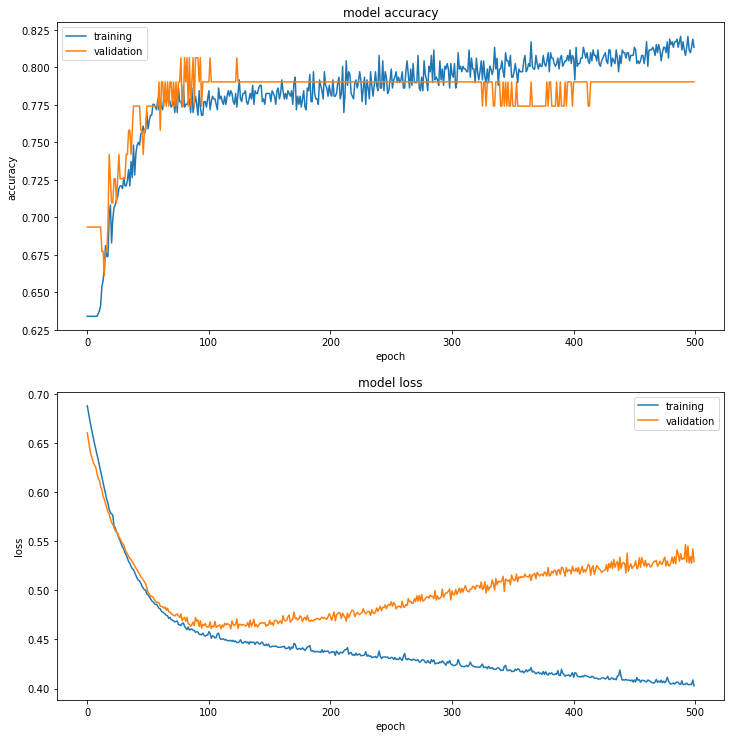

In [260]:
def display_training_curves(training, validation, title, subplot):
  ax = plt.subplot(subplot)
  ax.plot(training)
  ax.plot(validation)
  ax.set_title('model '+ title)
  ax.set_ylabel(title)
  ax.set_xlabel('epoch')
  ax.legend(['training', 'validation'])

plt.subplots(figsize=(10,10))
plt.tight_layout()
display_training_curves(history.history['accuracy'], history.history['val_accuracy'], 'accuracy', 211)
display_training_curves(history.history['loss'], history.history['val_loss'], 'loss', 212)

In [261]:
model.evaluate(X_test, y_test)

5/5 [==============================] - 0s 891us/step - loss: 0.5014 - accuracy: 0.7792


[0.5013684630393982, 0.7792207598686218]